# Stock Price Analysis: Indonesia's Four Largest Bank

#### Dhitya S Arieandra
#### dhityariendra@gmail.com


## 1. Libraries

In [1]:
import pandas as pd
import numpy as np 

# For time
from datetime import datetime

# For reading stock data
from yahoo_fin.stock_info import get_data 
from pandas_datareader.data import DataReader # using yahoo finance stock data

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
BBRI = DataReader('BBRI.JK', data_source='yahoo', start='2015-01-01', end=datetime.now())
BBCA = DataReader('BBCA.JK', data_source='yahoo', start='2015-01-01', end=datetime.now())
BBNI = DataReader('BBNI.JK', data_source='yahoo', start='2015-01-01', end=datetime.now())
BMRI = DataReader('BMRI.JK', data_source='yahoo', start='2015-01-01', end=datetime.now())

In [3]:
company_list = [BBRI, BBCA, BBNI, BMRI]
company_name = ["BBRI", "BBCA", "BBNI", "BMRI"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head()

High     Low    Open   Close       Volume    Adj Close  \
Date                                                                   
2015-01-02  2345.0  2305.0  2305.0  2330.0   45155000.0  1933.209595   
2015-01-05  2340.0  2315.0  2320.0  2320.0   49569000.0  1924.912354   
2015-01-06  2325.0  2300.0  2310.0  2305.0   65091500.0  1912.466919   
2015-01-07  2355.0  2315.0  2320.0  2355.0  146164500.0  1953.952393   
2015-01-08  2395.0  2360.0  2360.0  2395.0  146663500.0  1987.140381   

           company_name  
Date                     
2015-01-02         BBRI  
2015-01-05         BBRI  
2015-01-06         BBRI  
2015-01-07         BBRI  
2015-01-08         BBRI

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6188 entries, 2015-01-02 to 2021-03-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          6188 non-null   float64
 1   Low           6188 non-null   float64
 2   Open          6188 non-null   float64
 3   Close         6188 non-null   float64
 4   Volume        6188 non-null   float64
 5   Adj Close     6188 non-null   float64
 6   company_name  6188 non-null   object 
dtypes: float64(6), object(1)
memory usage: 386.8+ KB


In [5]:
df.describe()

High           Low          Open         Close        Volume  \
count   6188.000000   6188.000000   6188.000000   6188.000000  6.188000e+03   
mean    9559.720023   9359.463882   9463.213074   9459.614173  5.458880e+07   
std     8248.691154   8102.532583   8181.444180   8175.835992  6.396442e+07   
min     1675.000000   1595.000000   1610.000000   1660.000000  0.000000e+00   
25%     4400.000000   4300.000000   4350.000000   4350.000000  1.610362e+07   
50%     6550.000000   6387.500000   6475.000000   6475.000000  3.137425e+07   
75%    10625.000000  10175.000000  10475.000000  10456.250000  7.063202e+07   
max    36900.000000  35800.000000  36725.000000  36725.000000  8.726073e+08   

          Adj Close  
count   6188.000000  
mean    8944.848030  
std     8090.464797  
min     1408.954712  
25%     3981.868958  
50%     5901.475586  
75%     9662.181641  
max    36725.000000

## Adjustment Close Price

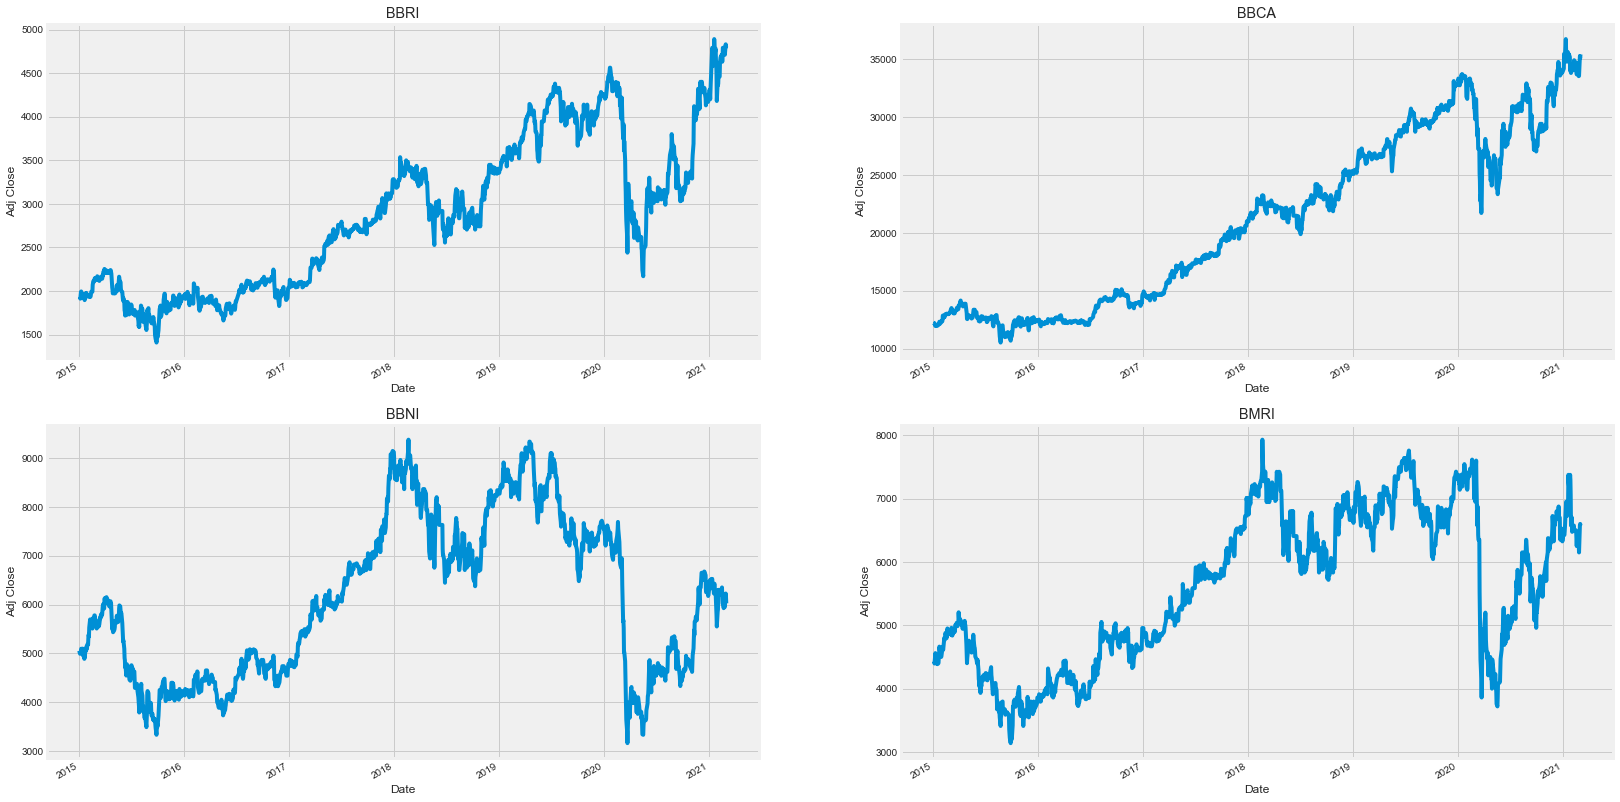

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(25, 15))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')

    plt.title(f"{company_name[i - 1]}")

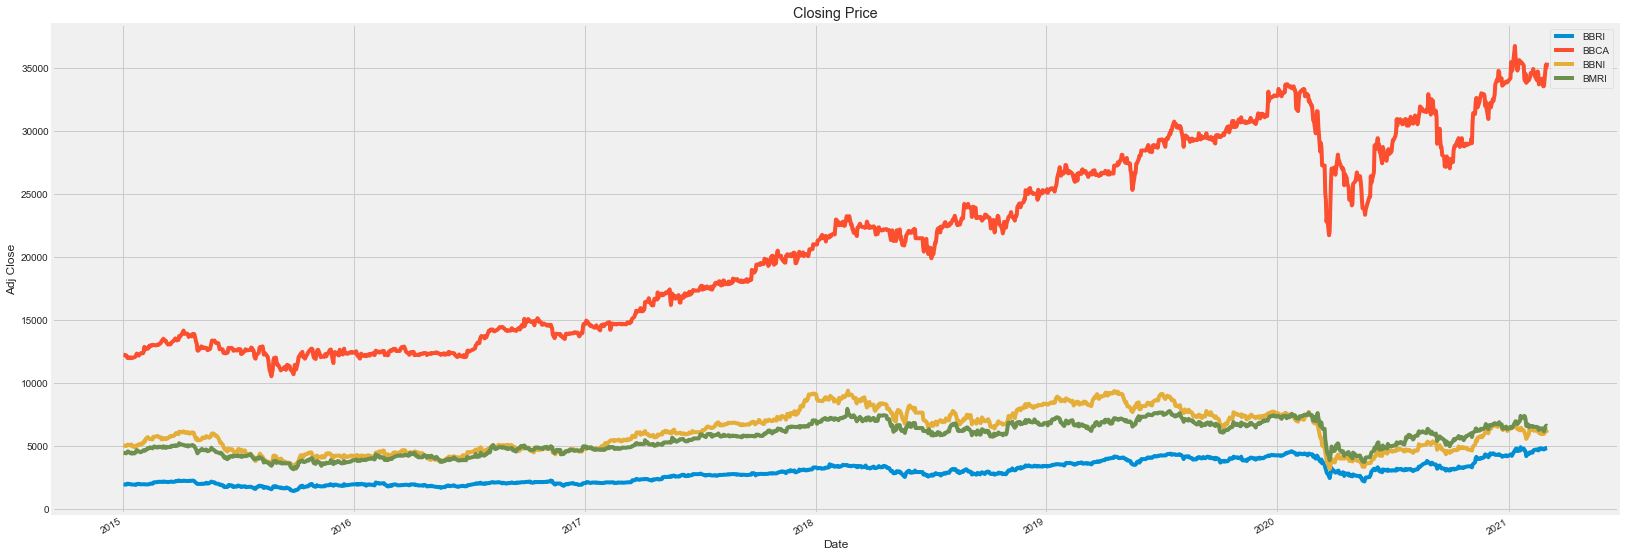

In [7]:
plt.figure(figsize=(25, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(1,1,1)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.legend(df["company_name"].unique())
    plt.title('Closing Price',loc='Center')
    plt.show

## Volume

Now let's plot the total volume of stock being traded each day

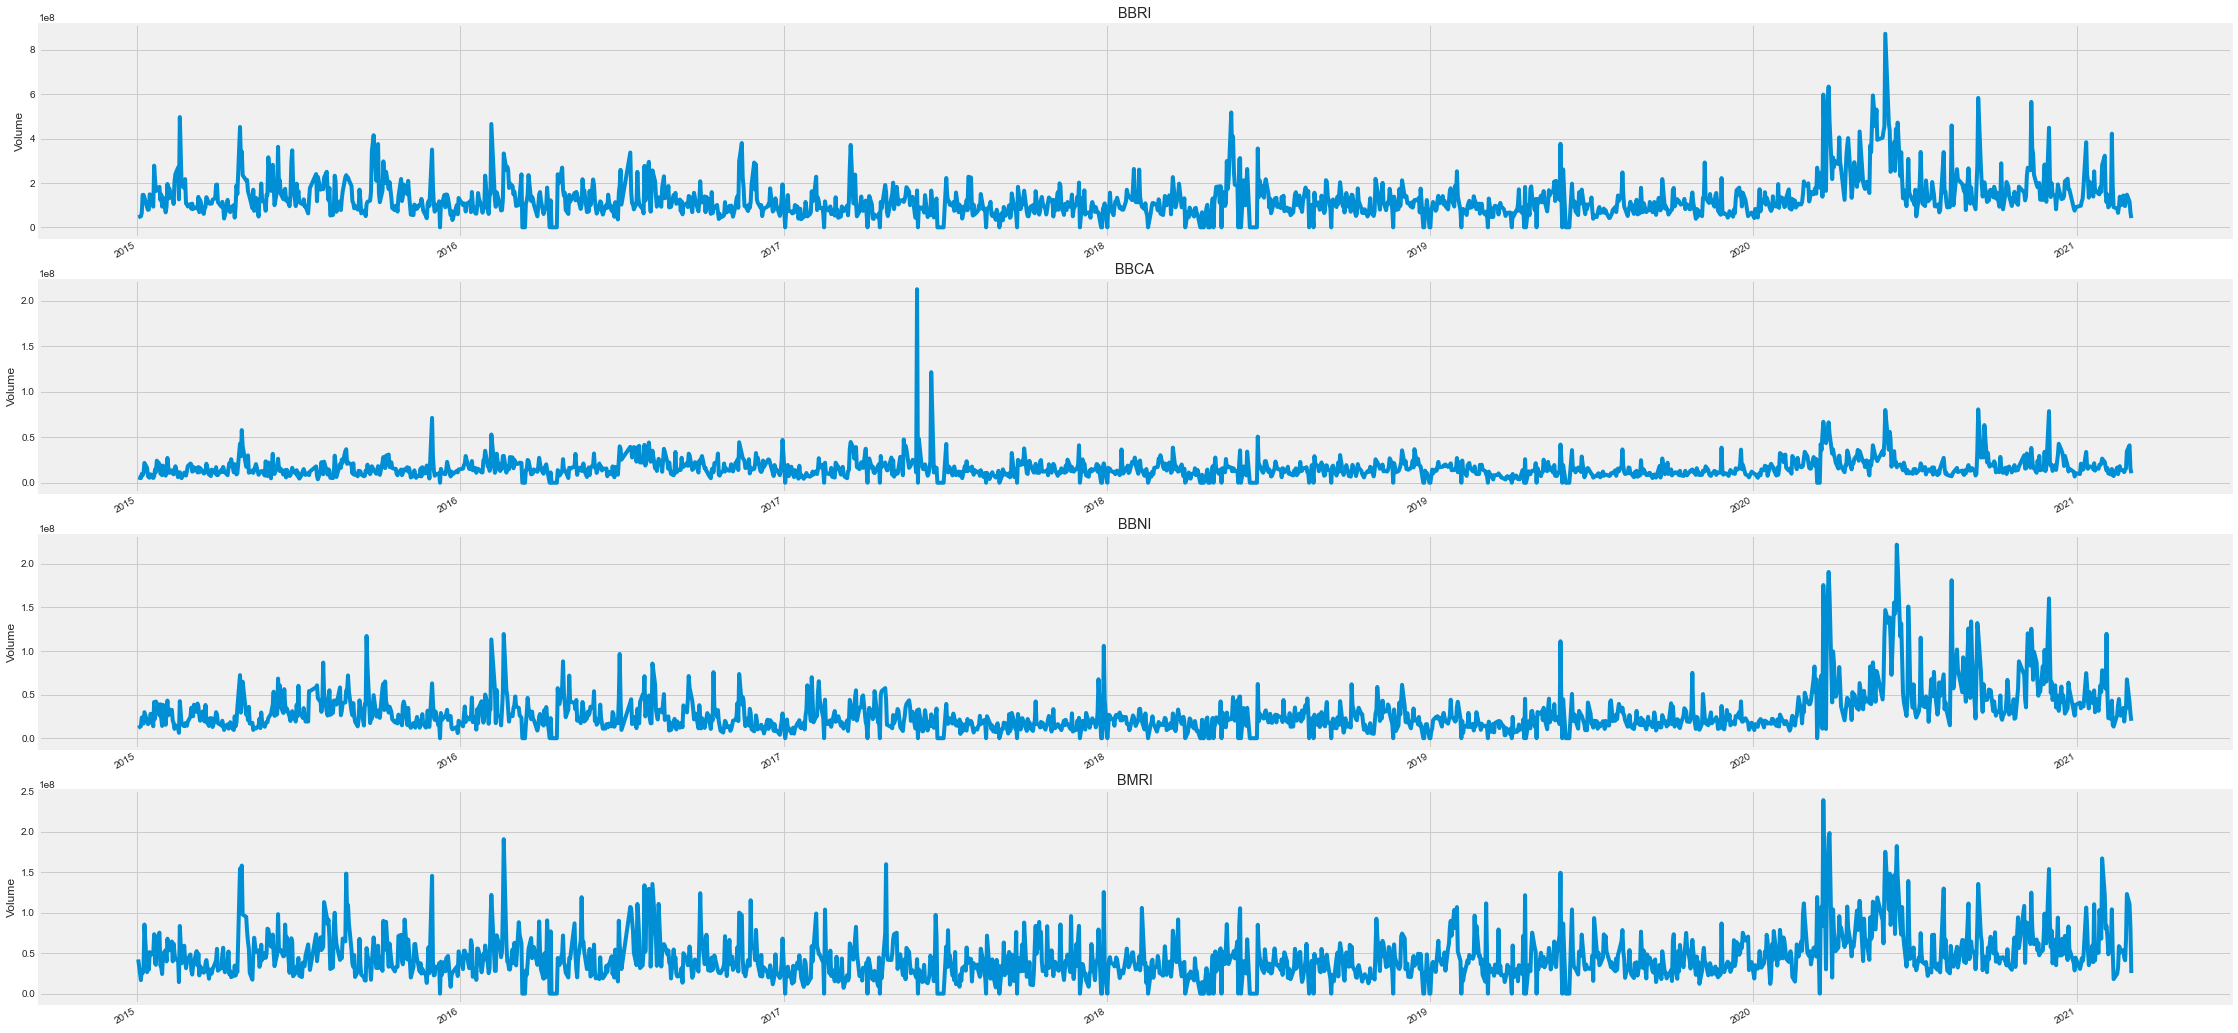

In [8]:
plt.figure(figsize=(35, 20))
for i, company in enumerate(company_list, 1):
    plt.subplot(4, 1, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{company_name[i - 1]}")

## Moving Average

In [9]:
# MOVING AVERAGE
ma_day = [10, 20, 50, 100]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

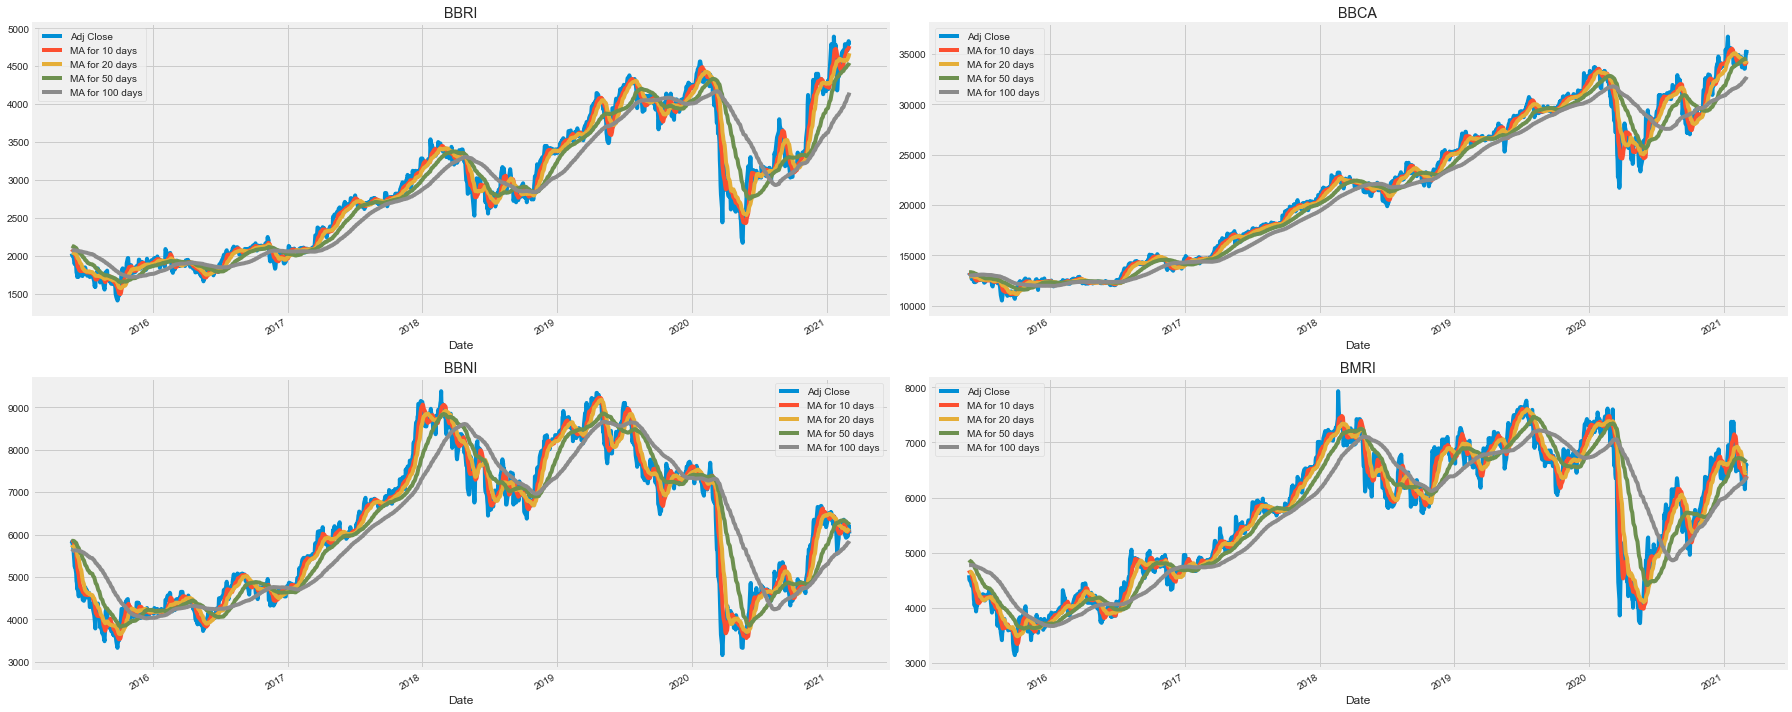

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(25)

BBRI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].dropna().plot(ax=axes[0,0])
axes[0,0].set_title('BBRI')

BBCA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].dropna().plot(ax=axes[0,1])
axes[0,1].set_title('BBCA')

BBNI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].dropna().plot(ax=axes[1,0])
axes[1,0].set_title('BBNI')

BMRI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].dropna().plot(ax=axes[1,1])
axes[1,1].set_title('BMRI')


fig.tight_layout()

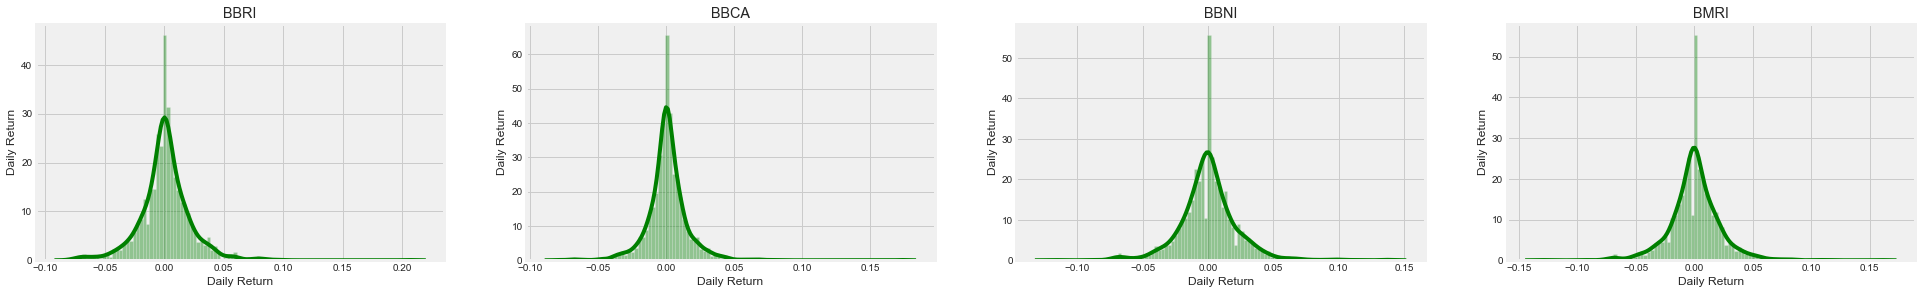

In [11]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()


# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(30, 20))

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 4, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='green')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')


<Figure size 1152x576 with 0 Axes>

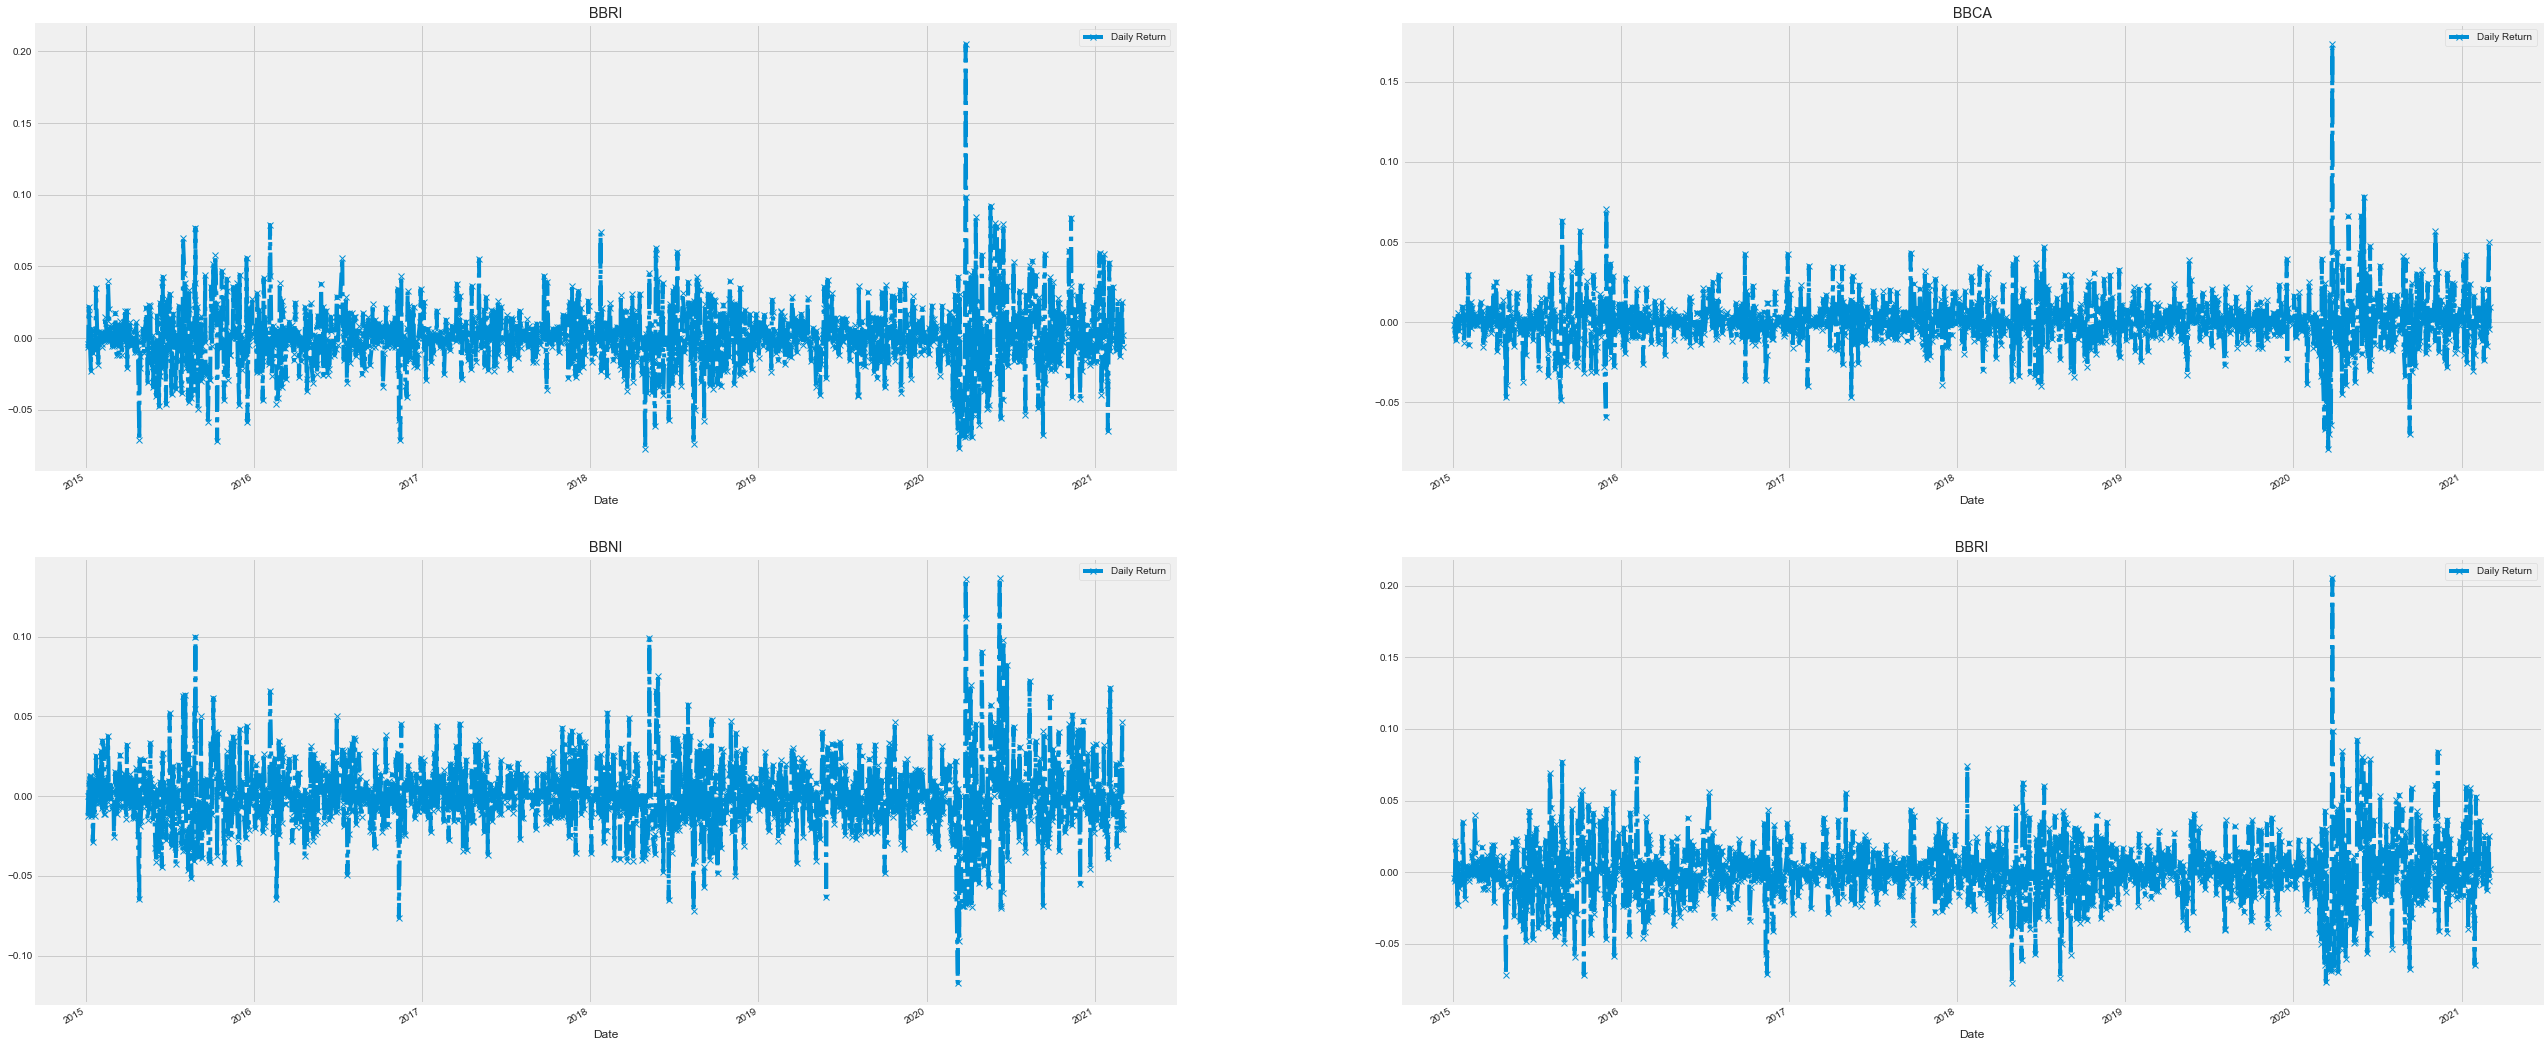

In [12]:
# Then we'll plot the daily return percentage
plt.figure(figsize=(16,8))
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(40)

BBRI['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-.', marker='x')
axes[0,0].set_title('BBRI')

BBCA['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-.', marker='x')
axes[0,1].set_title('BBCA')

BBNI['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-.', marker='x')
axes[1,0].set_title('BBNI')

BBRI['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-.', marker='x')
axes[1,1].set_title('BBRI')


plt.show()

## Risk vs Expected Return

In [13]:
closing_df = pd.DataFrame(df.reset_index(), columns=['Date', 'Adj Close', 'company_name'])
closing_df = closing_df.pivot_table('Adj Close','Date','company_name')
closing_df.tail()

company_name     BBCA    BBNI    BBRI    BMRI
Date                                         
2021-02-25    33525.0  6075.0  4730.0  6275.0
2021-02-26    33550.0  5950.0  4710.0  6150.0
2021-03-01    35225.0  6225.0  4830.0  6575.0
2021-03-02    35075.0  6150.0  4800.0  6600.0
2021-03-03    35400.0  6025.0  4810.0  6575.0

In [14]:
ret = closing_df.pct_change()
ret.head()

company_name      BBCA      BBNI      BBRI      BMRI
Date                                                
2015-01-02         NaN       NaN       NaN       NaN
2015-01-05   -0.001890 -0.012295 -0.004292 -0.002310
2015-01-06   -0.007576  0.000000 -0.006465 -0.006944
2015-01-07    0.001908  0.008299  0.021692  0.011655
2015-01-08   -0.011429  0.000000  0.016985  0.009217

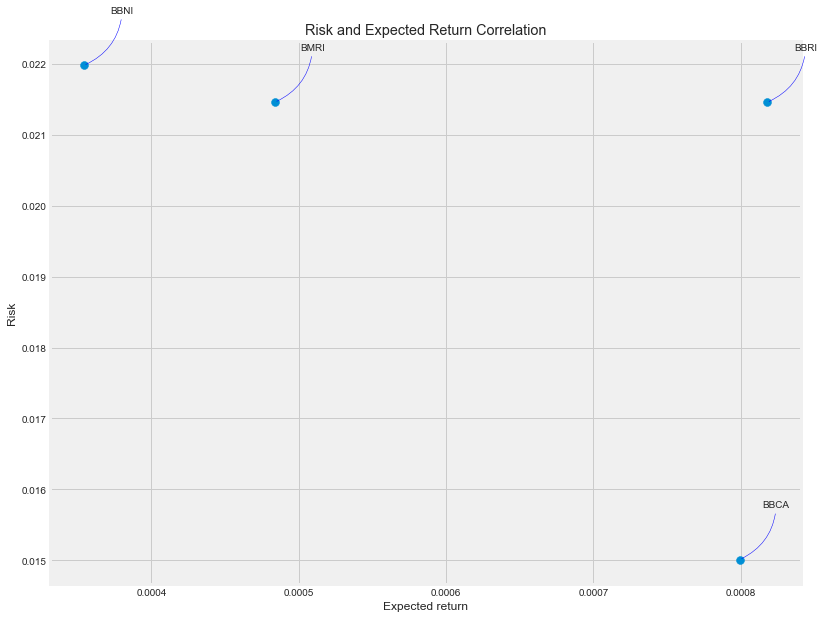

In [15]:
# Let's start by defining a new DataFrame as a cleaned version of the original DataFrame
ret = ret.dropna()
area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(ret.mean(), ret.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Risk and Expected Return Correlation')

for label, x, y in zip(ret.columns, ret.mean(), ret.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Predicting the BBCA Closing Price

## Model Preparation

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the ***Daily Return*** column.

In [16]:
x = BBCA[['High','Low', 'Open', 'Close', 'Volume','Adj Close']]
y = BBCA[['Daily Return']]

print('X:',x.head(),'\n____________________________________________________________________')
print('Y:',y.head())

X:                High      Low     Open    Close      Volume     Adj Close
Date                                                                    
2015-01-02  13275.0  13150.0  13275.0  13225.0   5860500.0  12227.805664
2015-01-05  13200.0  13125.0  13150.0  13200.0   5086900.0  12204.692383
2015-01-06  13200.0  13000.0  13000.0  13100.0   9736300.0  12112.232422
2015-01-07  13200.0  13050.0  13050.0  13125.0   8066800.0  12135.346680
2015-01-08  13150.0  12975.0  13125.0  12975.0  10891400.0  11996.657227 
____________________________________________________________________
Y:             Daily Return
Date                    
2015-01-02           NaN
2015-01-05     -0.001890
2015-01-06     -0.007576
2015-01-07      0.001908
2015-01-08     -0.011429


There are Nan values here, so we gotta do a cleansing data:

In [17]:
# Data Cleaning
y = y.fillna(0)

### Train and Test Split

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('normalizer',Normalizer()),
    ('stdscalar', StandardScaler())
])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.fit_transform(x_test)

print("x_train:")
print(x_train.shape,'\n__________________________________________________________________')
print("y_train:")
print(y_train.shape,'\n__________________________________________________________________')
print("x_test:")
print(x_test.shape,'\n__________________________________________________________________')
print("y_test:")
print(y_test.shape,'\n__________________________________________________________________')


x_train:
(1082, 6) 
__________________________________________________________________
y_train:
(1082, 1) 
__________________________________________________________________
x_test:
(465, 6) 
__________________________________________________________________
y_test:
(465, 1) 
__________________________________________________________________


## 1. Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
lr.fit(x_test, y_test)

LinearRegression(normalize=True)

### a. Prediction from Regression Linear Model

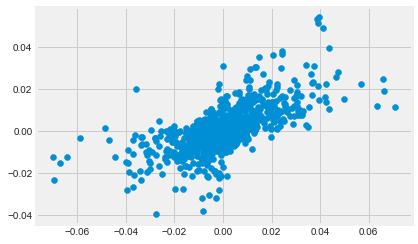

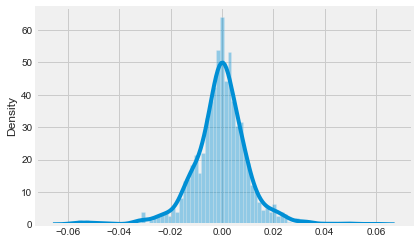

In [21]:
pred_lr = lr.predict(x_train)

plt.scatter(y_train, pred_lr)
plt.show()
sns.distplot((y_train - pred_lr), bins=80);

### b. Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [22]:
from sklearn import metrics

def cross_val(model):
    pred = cross_val_score(model, x, y)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)

    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

### c. Regression Model Evaluation

In [23]:
print('Intercept:',lr.intercept_)
print('========================================================================')
print('Coeff:', lr.coef_)
print('========================================================================')

Intercept: [0.00109704]
Coeff: [[ 5.96915914e+00 -1.16568369e+01 -4.13380242e+01  4.69255373e+01
  -1.35248764e-01 -3.52594665e-02]]


In [24]:
test_pred = lr.predict(x_test)
train_pred = lr.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('============================================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.007867929731451425
MSE: 0.0001678029376293334
RMSE: 0.012953877320298096
R2 Square 0.31025324339930327
Train set evaluation:
_____________________________________
MAE: 0.007613866022054878
MSE: 0.000122453861707163
RMSE: 0.011065887298683418
R2 Square 0.43625760605026276


## 2. Deep Learning: Long Short Term Memory Model (LSTM)

### a. Data Scaling

In [80]:
data = BBCA.filter(['Close'])
dataset = data.values

#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print('Scaled data:\n',scaled_data,'\n')

training_data_len = int(np.ceil( len(dataset) * .8 ))
print('training_data_len:\n',training_data_len)

Scaled data:
 [[0.07571288]
 [0.0747296 ]
 [0.07079646]
 ...
 [0.94100295]
 [0.93510324]
 [0.94788594]] 

training_data_len:
 1238


### b. Create the Train and Test Dataset


In [82]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.07571288, 0.0747296 , 0.07079646, 0.07177974, 0.06588004,
       0.06391347, 0.06686332, 0.06686332, 0.06391347, 0.06489676,
       0.06489676, 0.06686332, 0.06784661, 0.06981318, 0.0747296 ,
       0.07964602, 0.07276303, 0.0747296 , 0.07767945, 0.07964602,
       0.08161259, 0.0806293 , 0.08652901, 0.10226155, 0.09439528,
       0.09439528, 0.09832842, 0.09636185, 0.10324484, 0.10226155])]
[0.10717797443461163]

[array([0.07571288, 0.0747296 , 0.07079646, 0.07177974, 0.06588004,
       0.06391347, 0.06686332, 0.06686332, 0.06391347, 0.06489676,
       0.06489676, 0.06686332, 0.06784661, 0.06981318, 0.0747296 ,
       0.07964602, 0.07276303, 0.0747296 , 0.07767945, 0.07964602,
       0.08161259, 0.0806293 , 0.08652901, 0.10226155, 0.09439528,
       0.09439528, 0.09832842, 0.09636185, 0.10324484, 0.10226155]), array([0.0747296 , 0.07079646, 0.07177974, 0.06588004, 0.06391347,
       0.06686332, 0.06686332, 0.06391347, 0.06489676, 0.06489676,
       0.06686332, 0.06784661, 0.

In [83]:
#Create the testing data set
test_data = scaled_data[training_data_len - 30: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

### c. Defining the LSTM Model

To define this LSTM model, I will use the following statements below:

- Build LSTM model with 2 layers each with 50 nodes
- Add two hidden layers each with 25 nodes and 1 final layer with only one node
- The model will train with 5 batch and 10 epochs


To optimize the model, I use adam optimization algorithm to speedups the optimization process and log loss using mean average error

In [96]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization

# Define the LSTM model
lstm = Sequential()
lstm.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
lstm.add(LSTM(50, return_sequences= False))
lstm.add(Dense(25))
lstm.add(Dense(1))

# Compile the model
lstm.compile(optimizer='adam', loss='mae')

# Summarize the model
lstm.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 30, 50)            10400     
_________________________________________________________________
lstm_35 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_44 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


### d. Model Training

In [97]:
# Train the model
lstm.fit(x_train, y_train, batch_size=5, epochs=10)

Epoch 1/10
242/242 [==============================] - 4s 15ms/step - loss: 0.0321
Epoch 2/10
242/242 [==============================] - 3s 14ms/step - loss: 0.0170
Epoch 3/10
242/242 [==============================] - 4s 15ms/step - loss: 0.0171
Epoch 4/10
242/242 [==============================] - 4s 15ms/step - loss: 0.0143
Epoch 5/10
242/242 [==============================] - 4s 14ms/step - loss: 0.0154
Epoch 6/10
242/242 [==============================] - 4s 15ms/step - loss: 0.0133
Epoch 7/10
242/242 [==============================] - 4s 15ms/step - loss: 0.0117
Epoch 8/10
242/242 [==============================] - 3s 14ms/step - loss: 0.0124
Epoch 9/10
242/242 [==============================] - 3s 14ms/step - loss: 0.0117
Epoch 10/10
242/242 [==============================] - 3s 14ms/step - loss: 0.0114


In [92]:
# Get the models predicted price values 
predictions = lstm.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions.shape)

(309, 1)


### e. Model Visualization

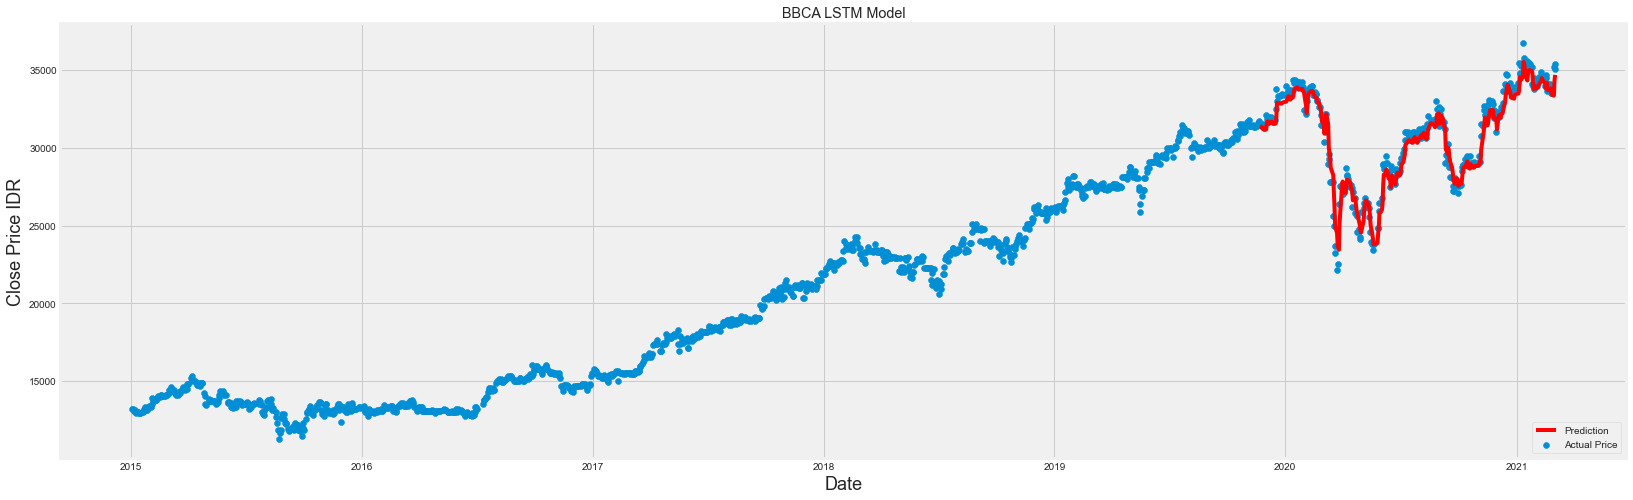

In [93]:
# Plot the data
actual_price = BBCA.reset_index()
validation = data[training_data_len:]
validation['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(25,8))
plt.title('BBCA LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.scatter(actual_price['Date'],actual_price['Close'])
plt.plot(validation[['Predictions']],color="red")
plt.legend(['Prediction', 'Actual Price'], loc='lower right')
plt.show()

### f. LSTM Model Evaluation

In [98]:
validation['Percentage']=(validation['Predictions']/validation['Close'])
validation['Percentage'].mean()

print("Actual :", validation['Close'].mean())
print("Predictons :", validation['Predictions'].mean())
print("Percentage", validation['Percentage'].mean()*100, "%")

Actual : 30886.569579288025
Predictons : 30663.133
Percentage 99.38013760562524 %


In [100]:
test_pred = lstm.predict(x_test)
train_pred = lstm.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 30885.79207652296
MSE: 963340149.7067782
RMSE: 31037.721400044466
R2 Square -101.38828517728474
Train set evaluation:
_____________________________________
MAE: 0.00827405606266046
MSE: 0.0001248899081067322
RMSE: 0.011175415343813052
R2 Square 0.997723301721297


# Thank You







**Dhitya S. Arieandra**

email: dhityariendra@gmail.com